---
---
# Convolutional Neural Network
---
---

## Libraries Imports

In [ ]:
#import tensorflow and keras
import tensorflow as tf
import keras
from keras import layers, models, datasets
from tensorflow.keras.preprocessing.image import ImageDataGenerator

import matplotlib.pyplot as plt
#import pandas and matplotlib for accurcy visualization
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.graph_objects as go

## Loading Data

The above method truly shines when used with big images and especially multi-channel images

**The CIFAR-100** dataset is a well-known dataset used in machine learning and computer vision for evaluating image recognition algorithms. It is a more complex and diverse dataset compared to its counterpart, CIFAR-10, primarily due to the larger number of classes.

![Cifar100](https://datasets.activeloop.ai/wp-content/uploads/2022/09/CIFAR-100-dataset-Activeloop-Platform-visualization-image.webp)

>- CIFAR-100 contains 60,000 32x32 color images.
>- The images are divided into 100 classes, each containing 600 images.
>- The 100 classes are grouped into 20 superclasses.
>- Each superclass encompasses several classes that are more specific; for example, the "aquatic mammals" superclass includes classes like "beaver", "dolphin", and "otter".

In [ ]:
# Loading the Dataset from Keras
cifar = datasets.cifar100
(X_train_full, y_train_full), (X_test, y_test) = cifar.load_data(label_mode='coarse')

#Spliting the training Dataset into train and validation
X_valid, X_train = X_train_full[:4000] / 255.0, X_train_full[4000:] / 255.0
y_valid, y_train = y_train_full[:4000], y_train_full[4000:]

Transformed images (Before preprocessing):


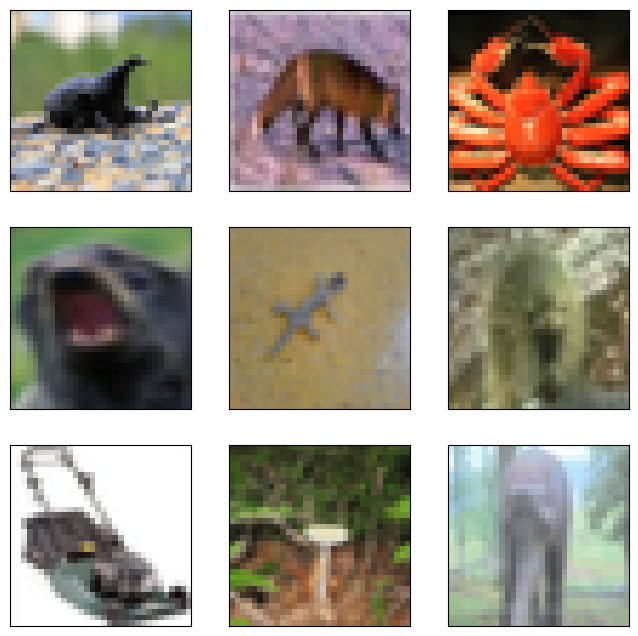

In [ ]:
print("Transformed images (Before preprocessing):")
plt.figure(figsize=(8, 8))
for i in range(9):
    plt.subplot(330 + 1 + i)
    plt.imshow(X_train[i])
    plt.xticks([])
    plt.yticks([])
plt.show()

## Image Preprocessing

### Keras IMageDataGenerator
The `ImageDataGenerator` class in Keras is a powerful tool that helps in preparing and augmenting image data in a way that is suitable for feeding into a neural network. Here’s a detailed breakdown of its functionalities and how it’s used:

#### Core Features of ImageDataGenerator
1. **Data Augmentation**: It can automatically apply random transformations to images during training which helps prevent the model from overfitting. These transformations include rotations, translations, scaling, shearing, and flips.

2. **Preprocessing**: It can normalize the images (e.g., scaling the pixel values to a range of 0 to 1), perform feature standardization, and more.

3. **Image Label Handling**: When used in conjunction with the `.flow_from_directory()` method, it automatically infers the class labels from the directory structure.

#### Common Methods of ImageDataGenerator
- **`flow()`**: Takes data & labels arrays, generates batches of augmented data.
- **`flow_from_directory()`**: Takes the path to a directory & generates batches of augmented data using the subfolders names as class labels.
- **`flow_from_dataframe()`**: This method allows you to read the images directly from a dataframe which contains the paths to the images and their corresponding labels.


### Data Preprocessing
Data preprocessing, involves techniques that are used to convert raw data into a clean data set. In the context of image data, preprocessing might include:
- Rescaling pixel values (e.g., normalizing the range to 0-1 or performing mean subtraction to center the data).
- Cropping, resizing, or padding images to a specified size.
- Converting image formats or modifying color channels.

### Preprocessing Steps using ImageDataGenerator
1. **Normalization:** Normalization scales the pixel values to a range of 0 to 1, which helps the neural network learn more efficiently as the inputs are small and consistent.

2. **Feature-wise Centering:** This subtracts the mean of the dataset from each input, centering the data around zero. This is particularly useful if the data has differing mean values and helps in faster convergence during training.

3. **Feature-wise Standardization:** This divides the input by the standard deviation of the dataset, scaling the inputs to unit variance. This is akin to Z-score normalization in statistics, making the model less sensitive to the scale of features.

4. **Cropping:** Artificially reducing the size of the image to focus on a central part. Note that ImageDataGenerator does not directly support cropping, so we often accomplish this through a custom preprocessing function.

5. **Resizing:** Adjusting the size of each image to a fixed size, which is crucial for ensuring consistent input dimensions for a neural network.

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Transformed images (after preprocessing):


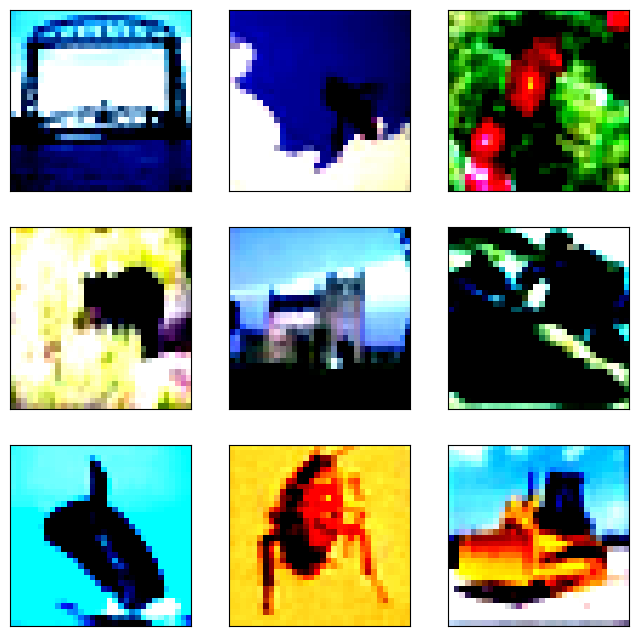

In [ ]:
# Define ImageDataGenerator with preprocessing functions
datagen = ImageDataGenerator(
    featurewise_center=True,    # subtract the dataset mean
    featurewise_std_normalization=True,  # divide by the dataset std
    rescale=1.0/255.0           # scale pixel values to [0,1]
)

# Calculate the mean and standard deviation on the training dataset
datagen.fit(X_train_full)

# Configure batch size and retrieve a batch of images
iterator = datagen.flow(X_train_full, y_train_full, batch_size=9)
batchX, batchy = next(iterator)

# Show images
print("Transformed images (after preprocessing):")
plt.figure(figsize=(8, 8))
for i in range(9):
    plt.subplot(330 + 1 + i)
    plt.imshow(batchX[i])
    plt.xticks([])
    plt.yticks([])
plt.show()

**Note:** This code demonstrates the application of feature-wise centering and normalization. Before using featurewise_center or featurewise_std_normalization, it's essential to calculate the mean and standard deviation across the dataset with datagen.fit(X_train_full); this configures the generator to correctly apply these transformations.

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Transformed images (after preprocessing):


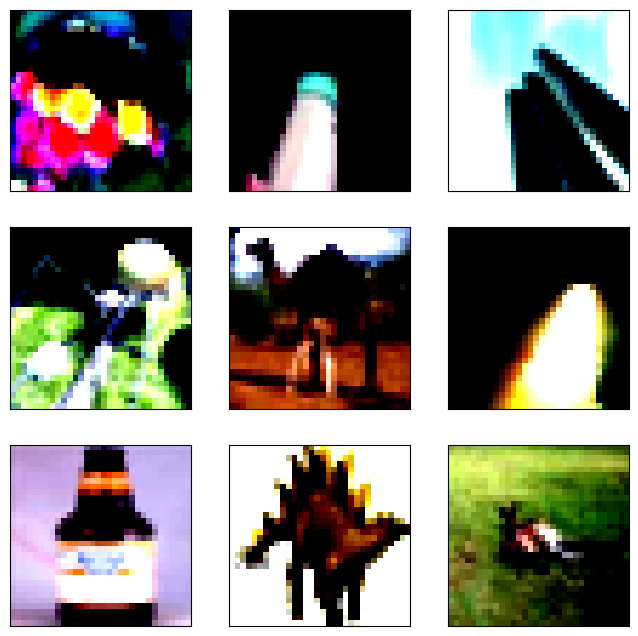

In [ ]:
# Define ImageDataGenerator with preprocessing functions
datagen_v2 = ImageDataGenerator(
    featurewise_center=True,    # subtract the dataset mean
    featurewise_std_normalization=True,  # divide by the dataset std
    rescale=1.0/255.0           # scale pixel values to [0,1]
)

# Calculate the mean and standard deviation on the training dataset
datagen_v2.fit(X_train_full)

# Configure batch size and retrieve a batch of images
iterator = datagen_v2.flow(X_train_full, y_train_full, batch_size=9)
batchX, batchy = next(iterator)

# Show images
print("Transformed images (after preprocessing):")
plt.figure(figsize=(8, 8))
for i in range(9):
    plt.subplot(330 + 1 + i)
    plt.imshow(batchX[i])
    plt.xticks([])
    plt.yticks([])
plt.show()


### Data Augmentation
Data augmentation involves artificially increasing the diversity of data available for training models without actually collecting new data. Techniques like the ones listed above alter the images in ways that are likely to occur in a real-world scenario. This process helps the model generalize better, preventing it from overfitting to the noise and specific details of the training data. These transformations effectively create variations of the training samples, which provide a richer set of data for the model to learn from.

### Data Augmentation Common Transformations
1. **Rotation**: Rotates the image by a random angle within a specified range. This helps the model to learn from various orientations of the same object.
2. **Width and Height Shifts**: These shifts move the image along the X and Y axes, respectively. It simulates the effect of objects being in different positions within the image, which is common in real-world scenarios.
3. **Shear**: Shearing distorts the image along an axis, primarily used to simulate 3D effects and object tilts.
4. **Zoom**: Randomly enlarges a portion of the image, which helps in recognizing objects or features at different scales.
5. **Horizontal Flip**: Mirrors the image across the vertical axis. This is particularly useful when the direction of the object is not a factor in classification.
6. **Fill Mode**: Determines how the input image is extended when rotated or shifted. `nearest` will replicate the nearest edge pixels.

Transformed images (Before preprocessing):


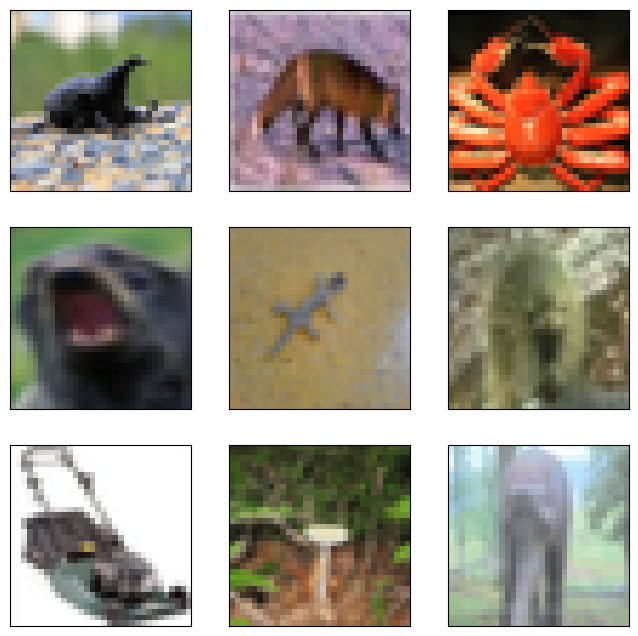

In [ ]:
#import tensorflow and keras
import tensorflow as tf
import keras
from keras import layers, models, datasets
from tensorflow.keras.preprocessing.image import ImageDataGenerator

import matplotlib.pyplot as plt
#import pandas and matplotlib for accurcy visualization
import numpy as np
import pandas as pd
import plotly.graph_objects as go
import numpy as np

# Loading the Dataset from Keras
cifar = datasets.cifar100
(X_train_full, y_train_full), (X_test, y_test) = cifar.load_data(label_mode='coarse')

#Spliting the training Dataset into train and validation
X_valid, X_train = X_train_full[:4000] / 255.0, X_train_full[4000:] / 255.0
y_valid, y_train = y_train_full[:4000], y_train_full[4000:]

print("Transformed images (Before preprocessing):")
plt.figure(figsize=(8, 8))
for i in range(9):
    plt.subplot(330 + 1 + i)
    plt.imshow(X_train[i])
    plt.xticks([])
    plt.yticks([])
plt.show()

Transformed images (after preprocessing):


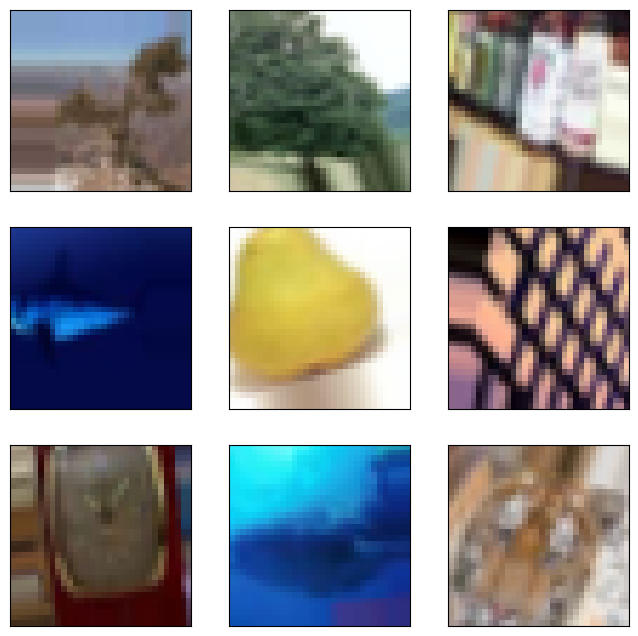

In [ ]:


# Create an ImageDataGenerator with various transformations
datagen_v3 = ImageDataGenerator(
    rotation_range=20,      # randomly rotate images in the range (degrees, 0 to 180)
    width_shift_range=0.2,  # randomly shift images horizontally (fraction of total width)
    height_shift_range=0.2, # randomly shift images vertically (fraction of total height)
    shear_range=0.2,        # randomly shear images
    zoom_range=0.2,         # randomly zoom in on images
    horizontal_flip=True,   # randomly flip images horizontally
    fill_mode='nearest'     # use the nearest pixels to fill gaps created by the above transformations
)

# Normalize the images to the range [0, 1] if they are not already
X_train_full = X_train_full.astype('float32') / 255.0

# Configure batch size and retrieve a batch of images
iterator = datagen_v3.flow(X_train_full, y_train_full, batch_size=9)
batchX, batchy = next(iterator)

# Convert images back to uint8 to display correctly
batchX = np.clip(batchX * 255, 0, 255).astype('uint8')

# Show images
print("Transformed images (after preprocessing):")
plt.figure(figsize=(8, 8))
for i in range(9):
    plt.subplot(330 + 1 + i)
    plt.imshow(batchX[i])
    plt.xticks([])
    plt.yticks([])
plt.show()


### Upscaling the Images

As you see some training images are degraded when augmented like the zoom transformation and the images them selves sometimes needs to be upscaled to perform better

Transformed images (Before preprocessing):


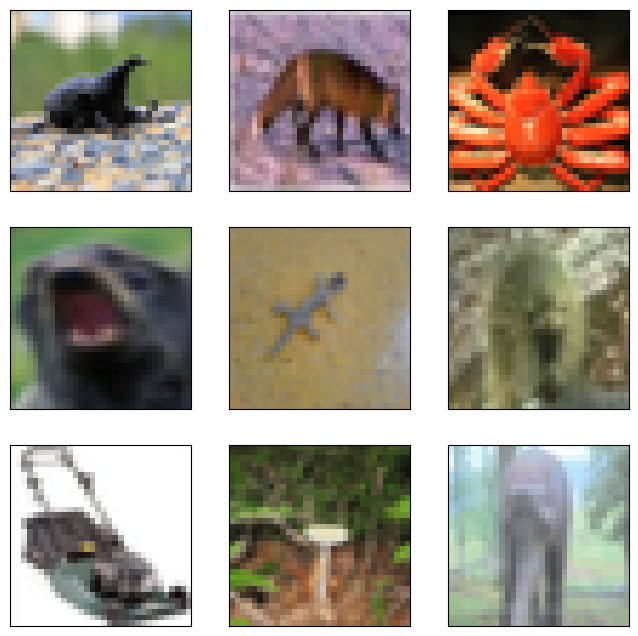

In [ ]:
#import tensorflow and keras
import tensorflow as tf
import keras
from keras import layers, models, datasets
from tensorflow.keras.preprocessing.image import ImageDataGenerator

import matplotlib.pyplot as plt
#import pandas and matplotlib for accurcy visualization
import numpy as np
import pandas as pd
import plotly.graph_objects as go
import numpy as np

# Loading the Dataset from Keras
cifar = datasets.cifar100
(X_train_full, y_train_full), (X_test, y_test) = cifar.load_data(label_mode='coarse')

#Spliting the training Dataset into train and validation
X_valid, X_train = X_train_full[:4000] / 255.0, X_train_full[4000:] / 255.0
y_valid, y_train = y_train_full[:4000], y_train_full[4000:]

print("Transformed images (Before preprocessing):")
plt.figure(figsize=(8, 8))
for i in range(9):
    plt.subplot(330 + 1 + i)
    plt.imshow(X_train[i])
    plt.xticks([])
    plt.yticks([])
plt.show()

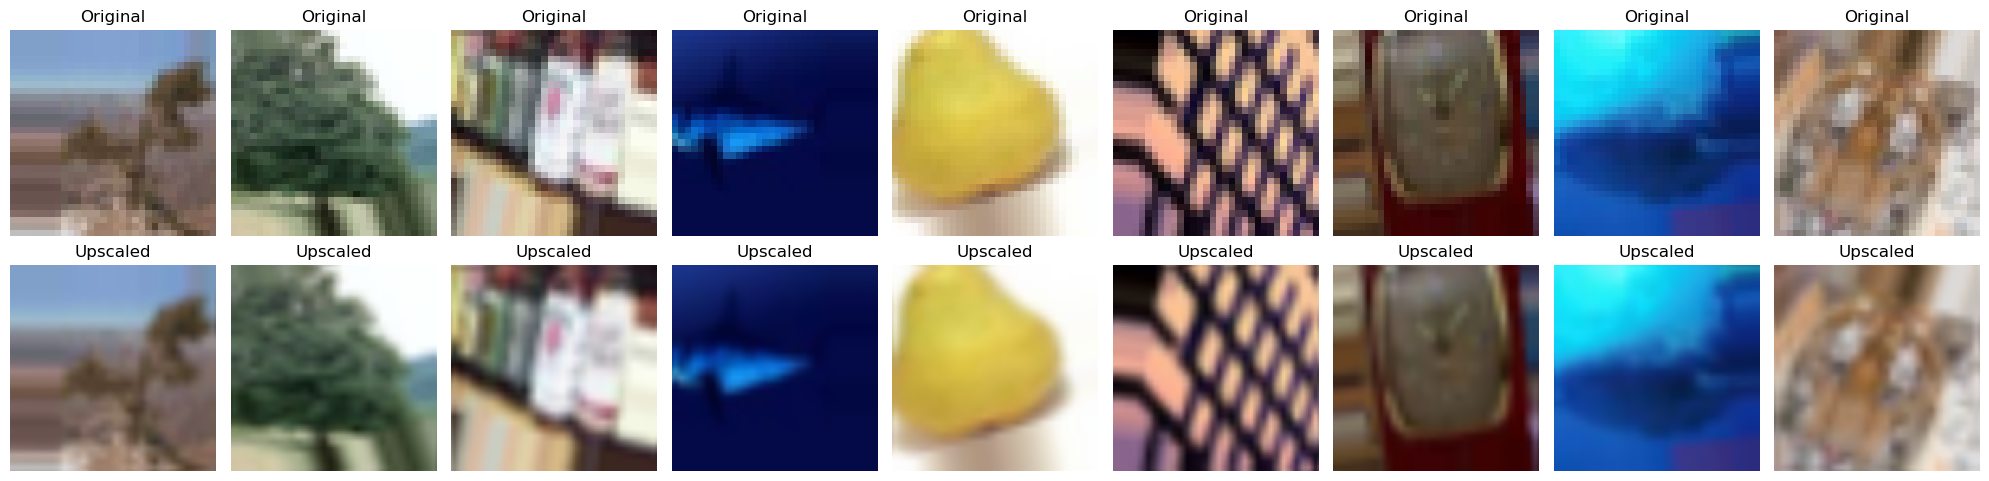

In [ ]:
from skimage.transform import resize

# Upscale images using scikit-image
upscaled_images = np.array([resize(image, (128, 128), anti_aliasing=True) for image in batchX])

# Display the original and upscaled images
fig, axes = plt.subplots(2, 9, figsize=(20, 5))
for i in range(9):
    ax = axes[0, i]
    ax.imshow(batchX[i])
    ax.axis('off')
    ax.set_title('Original')

    ax = axes[1, i]
    ax.imshow(upscaled_images[i])
    ax.axis('off')
    ax.set_title('Upscaled')

plt.tight_layout()
plt.show()

**Note:** The anti_aliasing parameter is set to True to smooth the image as it's upscaled, reducing aliasing artifacts.